In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Maruti_Swift_Sales_2016-2022.csv')

In [3]:
df.head()

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355


In [4]:
df.tail()

,Month,Sales
70,11-01-2021,14568
71,12-01-2021,15661
72,01-01-2022,19108
73,02-01-2022,19202
74,03-01-2022,13623


<AxesSubplot:>

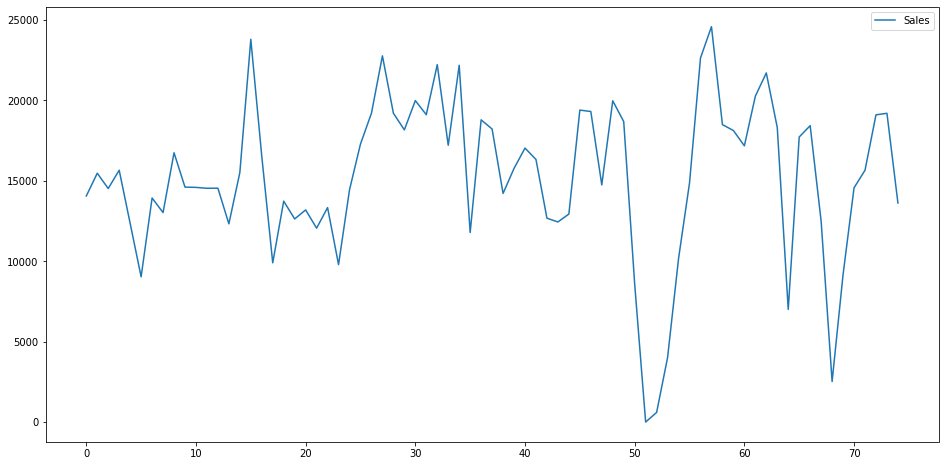

In [5]:
df.plot(figsize=(16,8))

In [6]:
df.head(n=6)

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355
5,06-01-2016,9033


In [7]:
df['Sales'].mean()

15189.32

In [8]:
df.describe()

,Sales
count,75.000000
mean,15189.320000
std,4938.414767
min,0.000000
25%,12805.500000
50%,15475.000000
75%,18592.000000
max,24589.000000


In [9]:
min_threshold = df['Sales'].quantile(0.10)
min_threshold

9425.2

In [10]:
st = df[df['Sales'] < min_threshold]
st

,Month,Sales
5,06-01-2016,9033
50,03-01-2020,8575
51,04-01-2020,0
52,05-01-2020,597
53,06-01-2020,4013
64,05-01-2021,7005
68,09-01-2021,2520
69,10-01-2021,9180


In [11]:
df.count()

Month    75
Sales    75
dtype: int64

In [12]:
for i in range(75):
    if df.loc[i , 'Sales'] < 9425.2:
        df.iat[i,1] = 15190

In [13]:
df.head(n = 6)

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355
5,06-01-2016,15190


In [14]:
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head(n = 6)

,Sales
Month,
2016-01-01,14057
2016-02-01,15475
2016-03-01,14524
2016-04-01,15661
2016-05-01,12355
2016-06-01,15190


<AxesSubplot:xlabel='Month'>

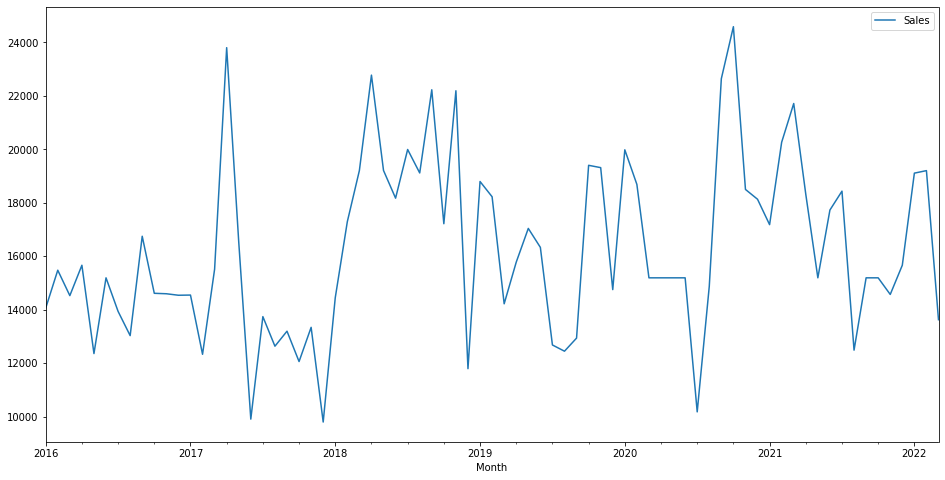

In [17]:
df.plot(figsize=(16,8))

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

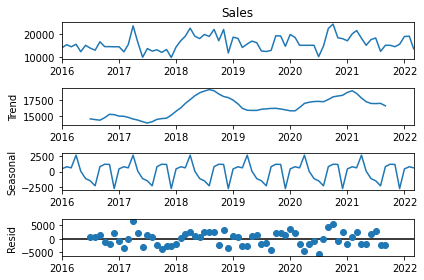

In [19]:
results = seasonal_decompose(df['Sales'])
results.plot();

In [20]:
len(df)

75

In [21]:
train = df.iloc[:69]
test = df.iloc[69:]

In [22]:
test

,Sales
Month,
2021-10-01,15190
2021-11-01,14568
2021-12-01,15661
2022-01-01,19108
2022-02-01,19202
2022-03-01,13623


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [25]:
scaled_train[:10]

array([[0.288186  ],
       [0.38402271],
       [0.31974858],
       [0.39659367],
       [0.17315491],
       [0.36476075],
       [0.27987294],
       [0.21857259],
       [0.4699243 ],
       [0.32562855]])

In [26]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
n_input = 6
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [28]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.288186   0.38402271 0.31974858 0.39659367 0.17315491 0.36476075]
Predict this y: 
 [[0.27987294]]


In [29]:
X.shape

(1, 6, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [31]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [33]:
# fit model
model.fit(generator,epochs=200)

Epoch 1/200
63/63 [==============================] - 1s 4ms/step - loss: 0.1136
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0572
Epoch 3/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 5/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 7/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 8/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 9/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 10/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 11/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 12/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 13/200
63/63 [=================

63/63 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 103/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 104/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 105/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 106/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 107/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 108/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 109/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 110/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 111/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 112/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 113/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 114/200
63/63 [=========

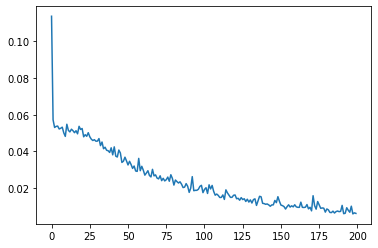

In [34]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [35]:
last_train_batch = scaled_train[-6:]

In [36]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [37]:
model.predict(last_train_batch)

array([[0.31029052]], dtype=float32)

In [38]:
scaled_test[0]

array([0.36476075])

In [39]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [40]:
test_predictions

[array([0.31029052], dtype=float32),
 array([0.17516485], dtype=float32),
 array([0.23994887], dtype=float32),
 array([0.30507386], dtype=float32),
 array([0.38025576], dtype=float32),
 array([0.4588358], dtype=float32)]

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)

In [42]:
test['Predictions'] = true_predictions

C:\Users\anand\AppData\Local\Temp/ipykernel_1836/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Month'>

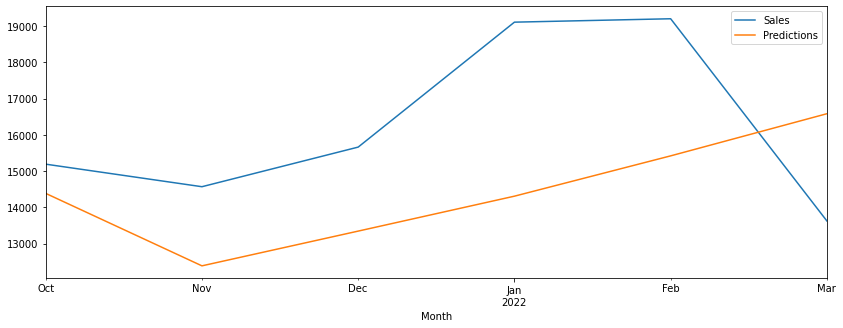

In [43]:
test.plot(figsize=(14,5))

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Sales'],test['Predictions']))
print(rmse)

3079.5883566407597
